In [44]:
import numpy as np
from scipy.optimize import minimize, basinhopping
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 150

def sq(x):
    return x ** 2 * (np.sin(x) ** 2 + 1)

In [52]:
methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B', 
'TNC', 'COBYLA', 'SLSQP', 'trust-constr', 'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov']
x0 = [6]

for method in methods:
    try:
        res = minimize(sq, x0, method=method, tol=1e-12)
    except Exception as E:
        print(f'`{method}` method can not be applicable:', E)
    else:
        print(f'Is `{method}` method good?', np.allclose(res.x, 0, 1e-3))

Is `Nelder-Mead` method good? False
Is `Powell` method good? False
Is `CG` method good? False
Is `BFGS` method good? False
`Newton-CG` method can not be applicable: Jacobian is required for Newton-CG method
Is `L-BFGS-B` method good? False
Is `TNC` method good? False
Is `COBYLA` method good? False
Is `SLSQP` method good? False
Is `trust-constr` method good? False
`dogleg` method can not be applicable: Jacobian is required for dogleg minimization
`trust-ncg` method can not be applicable: Jacobian is required for Newton-CG trust-region minimization
`trust-exact` method can not be applicable: Jacobian is required for trust region exact minimization.
`trust-krylov` method can not be applicable: ('Jacobian is required for trust region ', 'exact minimization.')


In [63]:
res = basinhopping(sq, x0, niter=400)
print('Is basin-hopping method good?', np.allclose(res.x, 0, 1e-3))

Is basin-hopping method good? True


In [64]:
res.x

array([2.18802765e-09])

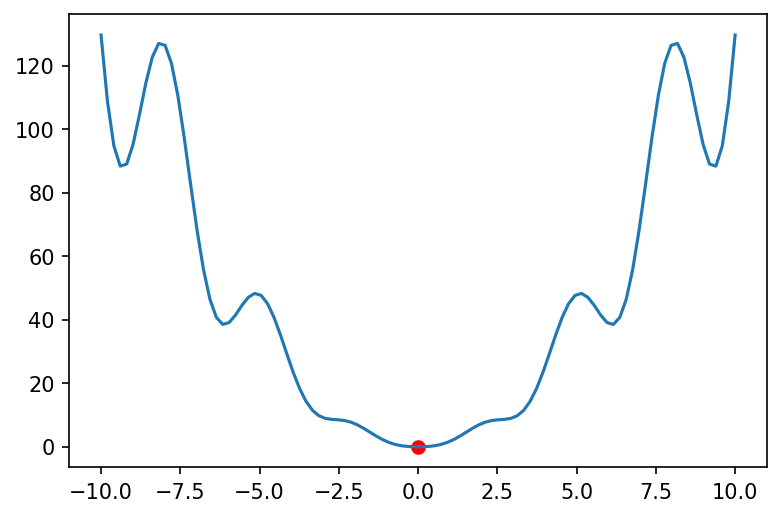

In [55]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sq(x))
plt.scatter(res.x, sq(res.x), color='r')